# O que vende um carro?

Você é analista na Lista de Eixo de Manivela. Centenas de propagandas gratuitas de veículos são publicadas no seu site todos os dias. Você precisa estudar os dados coletados nos últimos anos e determinar quais fatores influenciaram o preço de um veículo.

## Iniciação

Carregue bibliotecas que você acredita que são necessárias para o projeto.

In [1]:
# Carregando todas as bibliotecas

# Biblioteca Pandas
import pandas as pd

# Biblioteca Matplot
import matplotlib.pyplot as plt

### Carregue dados

Carregue os dados do projeto e dê uma olhada às informações gerais.

In [2]:
# Carregue o arquivo com os dados em um DataFrame
try:
    df = pd.read_csv('/datasets/vehicles_us.csv')
except:
    df = pd.read_csv('vehicles_us.csv')

### Explore os dados iniciais

O conjunto de dados contém os seguintes campos:
- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gasolina, diesel etc.
- `odometer` — a quilometragem do veículo quando a propaganda foi publicada 
- `transmission`
- `paint_color`
- `is_4wd` — Se o veículo é 4 por 4 (tipo Booleano)
- `date_posted` — a data que a propaganda foi publicada
- `days_listed` — dias desde a publicação até a retirada

Entendendo os campos, explore-os para se familiarizar com os dados.

In [3]:
# imprima as informações gerais/resumidas sobre o DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [4]:
# imprima uma amostragem dos dados
df.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17



**- Temos valores valores ausentes nas colunas:**

- `cylinders`
- `odometer`
- `model_year`      
- `paint_color`
- `is_4wd`

**- Temos colunas com valores que precisam de alteração:**

- `is_4wd`
- `date_posted`

**Obs:** As colunas citadas a cima necessitam de alteração no tipo de dados delas.

In [5]:
#Imprimindo os tipos de dados
df.dtypes

price             int64
model_year      float64
model            object
condition        object
cylinders       float64
fuel             object
odometer        float64
transmission     object
type             object
paint_color      object
is_4wd          float64
date_posted      object
days_listed       int64
dtype: object

- `is_4wd` Está coluna necessita ser mudada para valores boolenanos
- `date_posted` Está coluna também necessita mudar para o formato `datatime`

In [6]:
#Imprimindo o total de valores ausentes por coluna
df.isnull().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

Existem valores ausentes em todas as colunas ou apenas em algumas? Quais colunas contêm mais valores ausentes? 

- Existem valores ausente em algumas colunas e deve ser estudado como substituir estes valores ausentes ou deixa-los inalterados no caso se eles forem significativos. 

**As colunas que se encaixam nesta perspectiva são:**

- `cylinders`
- `odometer`
- `paint_color`
- `is_4wd`

In [7]:
#Imprimindo os 10 ultimos valores do dataframe
df.tail()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,NaN,2018-10-03,37
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,NaN,2018-11-14,22
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,NaN,2018-11-15,32
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,NaN,2018-07-02,71
51524,6300,2014.0,nissan altima,good,4.0,gas,NaN,automatic,sedan,NaN,NaN,2018-06-05,10


### Conclusões e próximos passos

**Temos colunas que parecem seguir o padrão devidos a elas. Mas temos colunas que fogem disso tendo assim valores ausentes e tipos de dados inapropriados.**

1- Deve ser tratado os dados ausentes já citados, verificando assim qual a melhor maneira de preenche-los.

2- Deve ser tratado os dados com tipos inapropriados já citados, verificando assim qual a melhor maneira de converte-los para o tipo certo.

In [8]:
#Imprimindo a quantidade de linhas e colunas do DataFrame
df.shape

(51525, 13)

## Cuide dos valores ausentes (se houver algum)

**Vamos modificar a coluna `is_4wd`,se um campo que é para ser booleano contém apenas valores True, é razoável presumir que valores ausentes são False, então vamos transformar os valores diferentes de 1 para em False.**

**Vamos fazer um laço for para substituir os valores ausentes das colunas `cylinders`, `odometer`, `model_year`, `paint_color` de forma mais efetiva.**


In [9]:
# Verificando os valores que existem na coluna 'is_4wd'
print(df['is_4wd'].unique())

# Preenchendo com 0 os valores que forem diferentes ao valor 1
df['is_4wd'] = df['is_4wd'].where(df['is_4wd'] == 1,0)

# Verificando o resultado dos valores que existem na coluna 'is_4wd'
print(df['is_4wd'].unique())

# Laço for para substituir colunas com valores ausentes
for columns in df.columns:
    if (columns == 'cylinders') | (columns == 'odometer') | (columns == 'model_year'):
        df[columns].fillna(value=df[columns].median(), inplace=True)
    if (columns == 'paint_color'):
        df[columns].fillna(value='Unknown', inplace=True)

#Verificando se ainda existe colunas com valores ausentes
df.isnull().sum()

[ 1. nan]
[1. 0.]


price           0
model_year      0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
type            0
paint_color     0
is_4wd          0
date_posted     0
days_listed     0
dtype: int64

## Corrija os tipos de dados

- `is_4wd` Está coluna necessita ser mudada para valores boolenanos
- `date_posted` Está coluna também necessita mudar para o formato `datetime`

In [10]:
# Transformando a coluna 'is_4wd' para booleana
df['is_4wd'] = df['is_4wd'].astype('bool')

# Corrigindo a coluna 'type' pois SUV está em maiuscula
df['type'] = df['type'].str.lower()

# Transformando a coluna 'date_posted' para datetime
df['date_posted'].unique()
df['date_posted'] = pd.to_datetime(df['date_posted'],format= '%Y-%m-%d')

# Verificando o resultado
df['date_posted'].head()

0   2018-06-23
1   2018-10-19
2   2019-02-07
3   2019-03-22
4   2019-04-02
Name: date_posted, dtype: datetime64[ns]

## Enriqueça os dados

In [11]:
# Adicione valores data/hora para quando a propaganda estiver colocada
df['week_posted'] = df['date_posted'].dt.weekday
df['year_posted'] = df['date_posted'].dt.year
df['month_posted'] = df['date_posted'].dt.month

# Verificando novas colunas
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,week_posted,year_posted,month_posted
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,suv,Unknown,True,2018-06-23,19,5,2018,6
1,25500,2011.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,4,2018,10
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,3,2019,2
3,1500,2003.0,ford f-150,fair,8.0,gas,113000.0,automatic,pickup,Unknown,False,2019-03-22,9,4,2019,3
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,1,2019,4


In [12]:
# Adicione a idade do veículo quando a propaganda for colocada
df['age_vehicle'] =  df['year_posted'] - df['model_year']

#Verificando nova coluna
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,week_posted,year_posted,month_posted,age_vehicle
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,suv,Unknown,True,2018-06-23,19,5,2018,6,7.0
1,25500,2011.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,4,2018,10,7.0
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,3,2019,2,6.0
3,1500,2003.0,ford f-150,fair,8.0,gas,113000.0,automatic,pickup,Unknown,False,2019-03-22,9,4,2019,3,16.0
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,1,2019,4,2.0


In [13]:
# Adicione a quilometragem média por ano
df['averege_mileage'] = df['odometer'] / df['age_vehicle']

#Verificando nova coluna
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,week_posted,year_posted,month_posted,age_vehicle,averege_mileage
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,suv,Unknown,True,2018-06-23,19,5,2018,6,7.0,20714.285714
1,25500,2011.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,4,2018,10,7.0,12672.142857
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,3,2019,2,6.0,18333.333333
3,1500,2003.0,ford f-150,fair,8.0,gas,113000.0,automatic,pickup,Unknown,False,2019-03-22,9,4,2019,3,16.0,7062.500000
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,1,2019,4,2.0,40451.500000


In [14]:
# Isso deve ajudar a substituir os valores condicionais por alguma coisa que pode ser manipulada mais facilmente
df['condition'].unique()

#Substitui o valor 'new' da coluna 'condition' para 5
df['condition'] = df['condition'].where(df['condition'] != 'new',5)

#Substitui o valor 'like new' da coluna 'condition' para 4
df['condition'] = df['condition'].where(df['condition'] != 'like new',4)

#Substitui o valor 'excellent' da coluna 'condition' para 3
df['condition'] = df['condition'].where(df['condition'] != 'excellent',3)

#Substitui o valor 'good' da coluna 'condition' para 2
df['condition'] = df['condition'].where(df['condition'] != 'good',2)

#Substitui o valor 'fair' da coluna 'condition' para 1
df['condition'] = df['condition'].where(df['condition'] != 'fair',1)

#Substitui o valor 'salvage' da coluna 'condition' para 0
df['condition'] = df['condition'].where(df['condition'] != 'salvage',0)

# Verificando resultado
df['condition'].unique()

array([2, 4, 1, 3, 0, 5], dtype=object)

## Verifique os dados limpos

In [15]:
# imprima as informações gerais/resumidas sobre o DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   price            51525 non-null  int64         
 1   model_year       51525 non-null  float64       
 2   model            51525 non-null  object        
 3   condition        51525 non-null  object        
 4   cylinders        51525 non-null  float64       
 5   fuel             51525 non-null  object        
 6   odometer         51525 non-null  float64       
 7   transmission     51525 non-null  object        
 8   type             51525 non-null  object        
 9   paint_color      51525 non-null  object        
 10  is_4wd           51525 non-null  bool          
 11  date_posted      51525 non-null  datetime64[ns]
 12  days_listed      51525 non-null  int64         
 13  week_posted      51525 non-null  int64         
 14  year_posted      51525 non-null  int64

In [16]:
# imprima uma amostragem dos dados
df.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,week_posted,year_posted,month_posted,age_vehicle,averege_mileage
0,9400,2011.0,bmw x5,2,6.0,gas,145000.0,automatic,suv,Unknown,True,2018-06-23,19,5,2018,6,7.0,20714.285714
1,25500,2011.0,ford f-150,2,6.0,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,4,2018,10,7.0,12672.142857
2,5500,2013.0,hyundai sonata,4,4.0,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,3,2019,2,6.0,18333.333333
3,1500,2003.0,ford f-150,1,8.0,gas,113000.0,automatic,pickup,Unknown,False,2019-03-22,9,4,2019,3,16.0,7062.500000
4,14900,2017.0,chrysler 200,3,4.0,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,1,2019,4,2.0,40451.500000
5,14990,2014.0,chrysler 300,3,6.0,gas,57954.0,automatic,sedan,black,True,2018-06-20,15,2,2018,6,4.0,14488.500000
6,12990,2015.0,toyota camry,3,4.0,gas,79212.0,automatic,sedan,white,False,2018-12-27,73,3,2018,12,3.0,26404.000000
7,15990,2013.0,honda pilot,3,6.0,gas,109473.0,automatic,suv,black,True,2019-01-07,68,0,2019,1,6.0,18245.500000
8,11500,2012.0,kia sorento,3,4.0,gas,104174.0,automatic,suv,Unknown,True,2018-07-16,19,0,2018,7,6.0,17362.333333
9,9200,2008.0,honda pilot,3,6.0,gas,147191.0,automatic,suv,blue,True,2019-02-15,17,4,2019,2,11.0,13381.000000


## Estude os parâmetros fundamentais

Os parâmetros são
- Preço
- A idade do veículo quando a propaganda foi colocada
- Quilometragem
- Número de cilindros
- Condição

count     51525.000000
mean      12132.464920
std       10040.803015
min           1.000000
25%        5000.000000
50%        9000.000000
75%       16839.000000
max      375000.000000
Name: price, dtype: float64

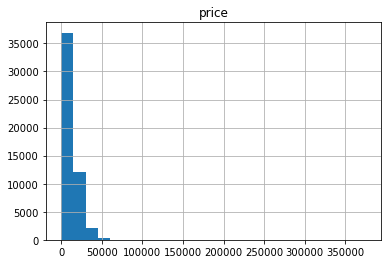

In [17]:
#Criando o histograma para preço
df.hist('price',bins=25);
df['price'].describe()

count    51525.000000
mean         8.469229
std          6.079773
min          0.000000
25%          4.000000
50%          7.000000
75%         12.000000
max        110.000000
Name: age_vehicle, dtype: float64

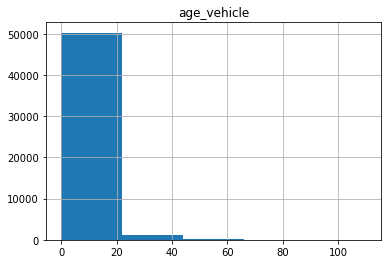

In [18]:
#Criando o histograma para idade do veiculo
df.hist('age_vehicle',bins=5);
df['age_vehicle'].describe()

count     51525.000000
mean     115162.352179
std       59909.264385
min           0.000000
25%       79181.000000
50%      113000.000000
75%      146541.000000
max      990000.000000
Name: odometer, dtype: float64

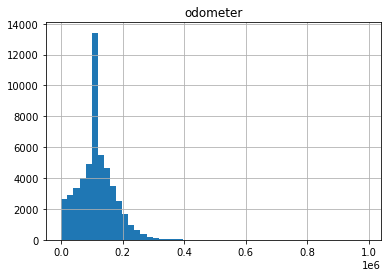

In [19]:
#Criando o histograma para quilometragem
df.hist('odometer',bins=50);
df['odometer'].describe()

count    51525.000000
mean         6.112450
std          1.573784
min          3.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         12.000000
Name: cylinders, dtype: float64

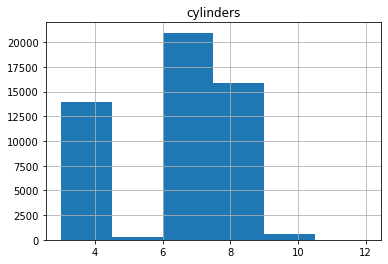

In [20]:
#Criando o histograma para cilindros
df.hist('cylinders',bins=6);
df['cylinders'].describe()

count     51525
unique        6
top           3
freq      24773
Name: condition, dtype: int64

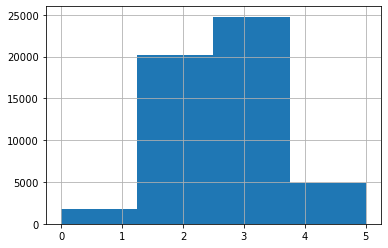

In [21]:
#Criando o histograma  para condição do veiculo
df['condition'].hist(bins=4);
df['condition'].describe()

## Estude e cuide dos valores ausentes

In [22]:
# Calculando Q1, Q3 e IQR
Q1_price = df['price'].quantile(0.25)
Q3_price = df['price'].quantile(0.75)
IQR_price = Q3_price - Q1_price
IQR_price

11839.0

In [23]:
# Determine o limite inferior para valores atípicos
limit_inferior_price = Q1_price - (1.5 * IQR_price)
limit_inferior_price

-12758.5

In [24]:
# Determine o limite superior para valores atípicos
limit_superior_price = Q3_price + (1.5 * IQR_price)
limit_superior_price

34597.5

In [25]:
# Armazene os dados sem os valores atípicos em um DataFrame separado
df_filtred = df.query('price > @limit_inferior_price and price < @limit_superior_price')
df_filtred.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,week_posted,year_posted,month_posted,age_vehicle,averege_mileage
0,9400,2011.0,bmw x5,2,6.0,gas,145000.0,automatic,suv,Unknown,True,2018-06-23,19,5,2018,6,7.0,20714.285714
1,25500,2011.0,ford f-150,2,6.0,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,4,2018,10,7.0,12672.142857
2,5500,2013.0,hyundai sonata,4,4.0,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,3,2019,2,6.0,18333.333333
3,1500,2003.0,ford f-150,1,8.0,gas,113000.0,automatic,pickup,Unknown,False,2019-03-22,9,4,2019,3,16.0,7062.500000
4,14900,2017.0,chrysler 200,3,4.0,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,1,2019,4,2.0,40451.500000


## Estude os parâmetros fundamentais sem valores atípicos

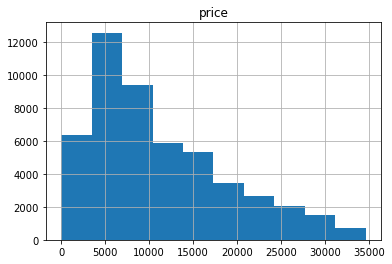

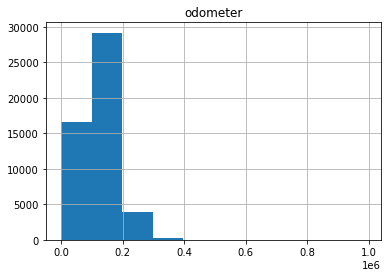

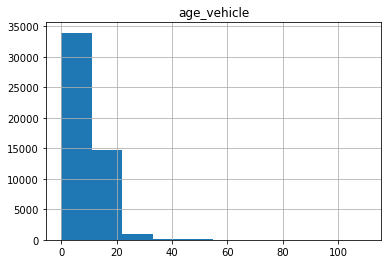

In [26]:
# #Criando os histogramas atreves de um laço for
for column in df_filtred.columns:
    if (column == 'price') | (column == 'age_vehicle') | (column == 'odometer'):
        df_filtred.hist(column)

## Tempo de vida das propagandas

Estude quantos dias propagandas foram exibidas (`days_listed`). Calcule a média e a mediana. Descreva o tempo de vida útil comum de uma propaganda. Determine quando as propagandas foram removidas rapidamente, e quando elas foram listadas por um tempo anormalmente longo.

count    49879.000000
mean        39.549871
std         28.206393
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64

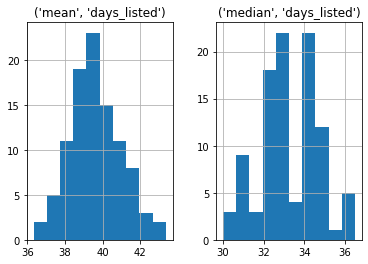

In [27]:
# Vendo histógrama de tempo médio e mediano das propagandas
df_filtred.pivot_table(index='model',values='days_listed',aggfunc=['mean','median']).hist();

# Vendo a média e a mediana
df_filtred['days_listed'].describe()

## Média de preços por cada tipo de veículo

Analise o número de propagandas e o preço médio para cada tipo de veículo. Construa um gráfico mostrando a dependência do número de propagandas em relação ao tipo de veículo. Selecione os dois tipos com os maiores números de propagandas.

,type,price,number_advertising
0,sedan,6942.349551,12147
1,suv,10359.897968,12104
2,truck,14820.840606,11550
3,pickup,14609.742072,6622
4,coupe,13269.010782,2226
5,wagon,8880.496408,1531
6,mini-van,8004.687986,1157
7,hatchback,6841.620459,1046
8,van,8743.340102,591
9,convertible,12511.617021,423


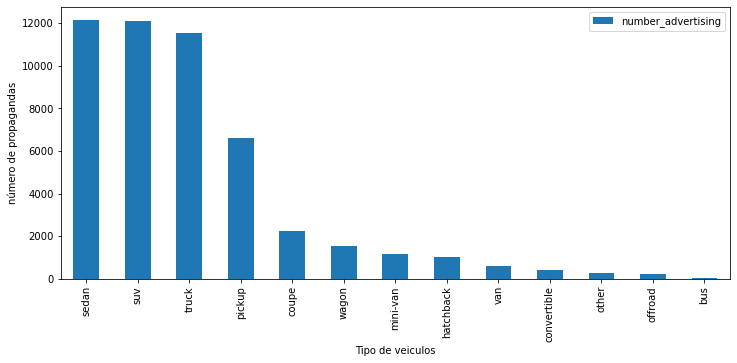

In [28]:
# Criando uma pivot_table de tipo e preço
median_vehicle = df_filtred.pivot_table(index='type', values='price')

# Contando os valores dentro do tipo, para saber o número de propagandas
number_advertising = df_filtred['type'].value_counts()

# Juntando o número de propagandas com a pivot_table
number_advertising_vehicle = median_vehicle.join(number_advertising)

# Renomeando as colunas
number_advertising_vehicle.columns = ['price', 'number_advertising']

# Ordenando os valores das propagandas
number_advertising_vehicle.sort_values('number_advertising',ascending=False, inplace=True)

# Resetando os index
number_advertising_vehicle.reset_index(inplace=True)

# Plotando o gráfico e modificando os labels
number_advertising_vehicle.plot(x='type',y='number_advertising',kind='bar',figsize=(12,5))
plt.ylabel('número de propagandas')
plt.xlabel('Tipo de veiculos')

# Vendo a tabela dinamica 'number_advertising_vehicle'   
number_advertising_vehicle

## Fatores de preço

Quais fatores impactam mais o preço? Pegue cada um dos tipos populares que você detectou no estágio anterior e estude se o preço depende da idade, quilometragem, condição, tipo de transmissão e cor. Para variáveis categóricas (tipo de transmissão e cor), construa gráficos de extremos e quartis, e crie gráficos de dispersão para o restante. Quando analisar variáveis categóricas, perceba que as categorias devem ter pelo menos 50 propagandas, caso contrário, seus parâmetros não serão válidos para analisar.

,price,age_vehicle,odometer
price,1.000000,-0.444815,-0.385034
age_vehicle,-0.444815,1.000000,0.411148
odometer,-0.385034,0.411148,1.000000


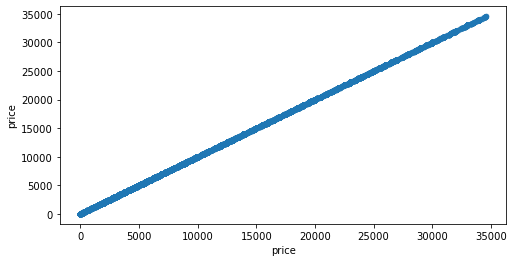

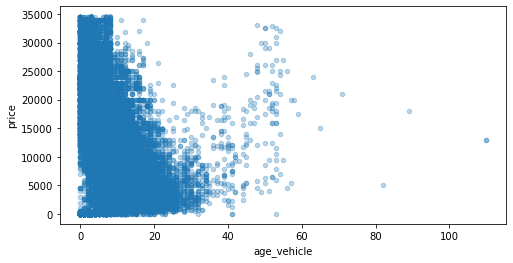

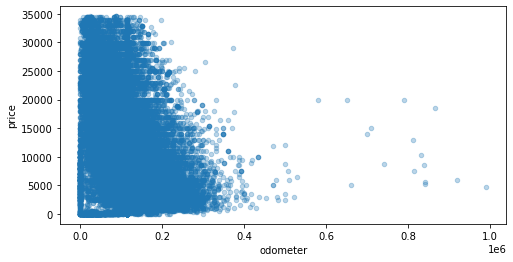

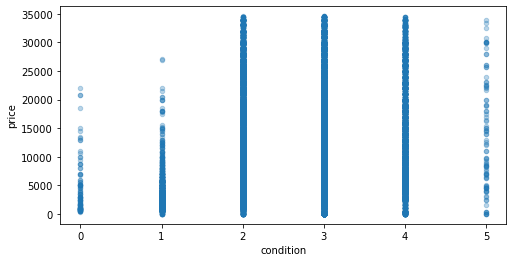

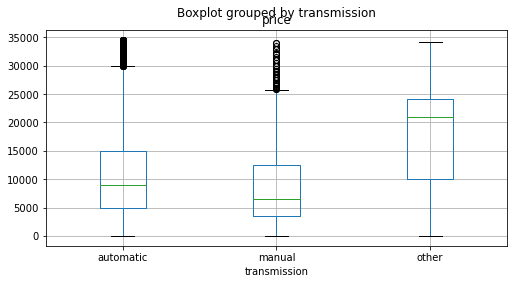

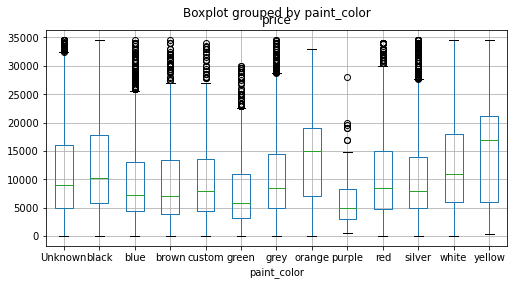

In [29]:
# Criando novo Data Frame filtrando tipos de carros com mais de 50 propagandas
new_data = df_filtred.query('type != "bus"')

# Filtrando colunas do Data Frame
new_data = new_data[['price','age_vehicle','odometer','condition','transmission','paint_color']]

# Fazendo um laço for para percorrer as colunas e verificar qual tipo elas são, e apartir disso criar o gráfico
for columns in new_data.columns:
    if (columns == 'transmission') | (columns == 'paint_color'):
        new_data.boxplot(column='price',by=columns,figsize=(8,4))
        
    else:
        new_data.plot(x=columns, y='price', kind='scatter', alpha=0.3,figsize=(8,4))

# Matriz de correlação 
new_data.corr()

## Conclusão geral

Abordamos valores ausentes, duplicados, valores atípicos e possíveis razões e soluções para artefatos problemáticos.

Algumas colunas tiverem que ser ajustadas tando por valores atipicos, quanto pelos tipos de dados inesperados.